In [1]:
# Starting with the usual imports
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import cv2
from PIL import Image

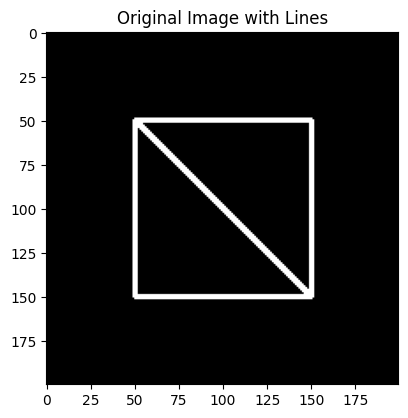

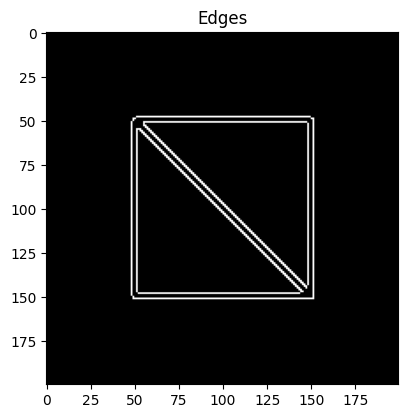

In [2]:
# Create a simple 2D image using pixel values
img = np.zeros((200, 200), dtype=np.uint8)

# Draw some lines on the image
cv2.line(img, (50, 50), (150, 50), 255, 2)  # Horizontal line
cv2.line(img, (50, 150), (150, 150), 255, 2)  # Horizontal line
cv2.line(img, (50, 50), (50, 150), 255, 2)  # Vertical line
cv2.line(img, (150, 50), (150, 150), 255, 2)  # Vertical line
cv2.line(img, (50, 50), (150, 150), 255, 2)  # Diagonal line

# View the initial image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image with Lines')
plt.imshow(img, cmap='gray')

# Apply an edge detector (Canny is the most popular for Hough Transforms
edges = cv2.Canny(img, 50, 150)
# View the edge image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

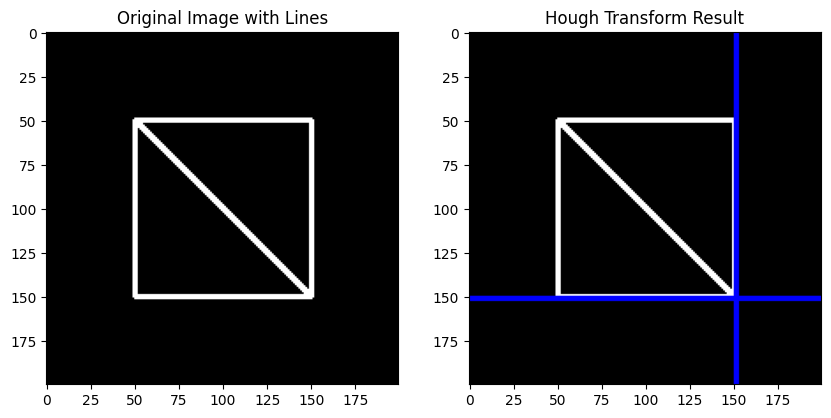

In [3]:
# Apply the Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Create an output image to draw the detected lines on the original image
output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Function to draw the lines
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Step 6: Plot the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image with Lines')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Hough Transform Result')
plt.imshow(output_img)
plt.show()

What went wrong?
There is a threshold parameter that determine how many votes an edge needs to become a line.
Let's adjust the threshold...

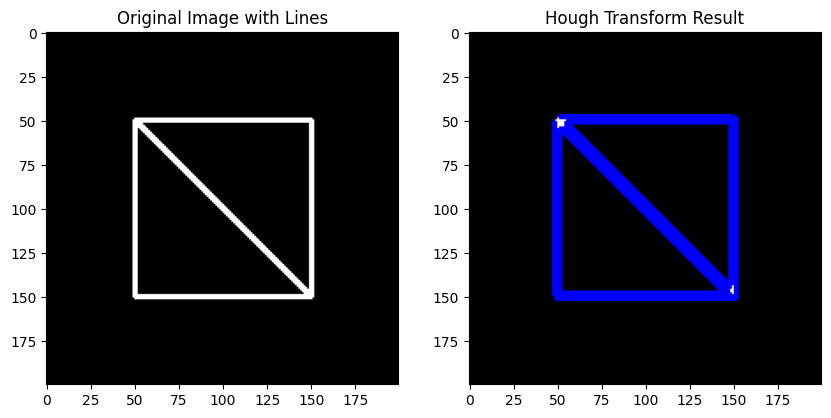

In [4]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=20, maxLineGap=5)

# Create an output image to draw the detected lines on the original image
output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Function to draw the lines
# Draw each line found by HoughLinesP
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Step 6: Plot the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image with Lines')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Hough Transform Result')
plt.imshow(output_img)
plt.show()